# Benthic habitat loss in the SKØG model 

(c) TJŠJ, please don't share beyond: Susan, Debby, Chris, Iria
(preliminary results / experimental plots)

We've recently completed a series of experimental runs comparing carbonate chemistry in the Salish Sea under two scenarios:

    BR (BASE RUN / PRESENT DAY):
        present-day wind, 
        present-day temperature, 
        present-day tides, 
        present-day atmospheric carbon dioxide concentrations 
            (~409 uatm),
        present-day lateral boundary 
            (open Pacific Ocean) dissolved inorganic carbon 

    PI (PREINDUSTRIAL RUN):
        present-day wind, 
        present-day temperature, 
        present-day tides, 
        preindustrial atmospheric carbon dioxide concentrations 
            (~280 uatm),
        estimated preindustrial lateral boundary 
            (open Pacific Ocean) dissolved inorganic carbon 
        
Here, we contrast the benthic habitat conditions in the two scenarios, using $\Omega_A$ (aragonite saturation state) as a marker for habitat viability. Physical oceanographers and biogeochemists often think of $\Omega_A$>1 as viable habitat and $\Omega_A$<1 as corrosive habitat; ecologists know that it's more complicated than that. I first look at some monthly averages and later look at a days-under-threshold-viability metric.

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pickle
import netCDF4 as nc
import numpy as np
import scipy as sp
import cmocean as cm
import warnings
warnings.filterwarnings('ignore')
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')

from matplotlib import reload

%matplotlib inline

### The benthic habitat in the Salish Sea

Here is a map of the benthic habitat in the Salish Sea, as seen by the SalishSeaCast model:

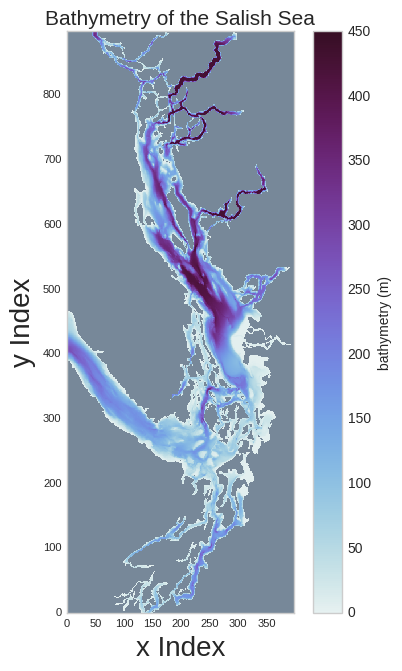

In [5]:
## map of bathymetry
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']

def plot_bathy(surfdat_1,tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit):

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap

    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 15 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max) 
    ax.set_xlabel('x Index', fontsize = 20 )
    ax.set_ylabel('y Index', fontsize = 20 )

    plt.xlim([0,398])
    plt.ylim([0,898])
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    cmap.set_bad('lightslategray')
    plt.suptitle(bigtit,fontsize=20)
    cbar = plt.colorbar(mesh)
    cbar.set_label(clabel)
fact = 0.25
plot_bathy(bath1,'Bathymetry of the Salish Sea', \
               cm.cm.dense,20*fact,30*fact,0,450,'bathymetry (m)','')

### A yearly average of $\Omega_A$ in the BR and PI scenarios

As a first look, let's visualise the yearly average benthic $\Omega_A$ ($\Omega_A$ in the lowest grid cell in the model in a given place) in the BR and PI scenarios, and how much it has changed.


In [6]:
f = open('./new_pickle/PI_OmA_year_benthos_mbath.pkl', 'rb')
PI_OmA_year_benthos_mbath = pickle.load(f)   
f = open('./new_pickle/BR_OmA_year_benthos_mbath.pkl', 'rb')
BR_OmA_year_benthos_mbath = pickle.load(f)   

PI_OmA_year_benthos_avg = np.nanmean(PI_OmA_year_benthos_mbath, axis = 0)
BR_OmA_year_benthos_avg = np.nanmean(BR_OmA_year_benthos_mbath, axis = 0)


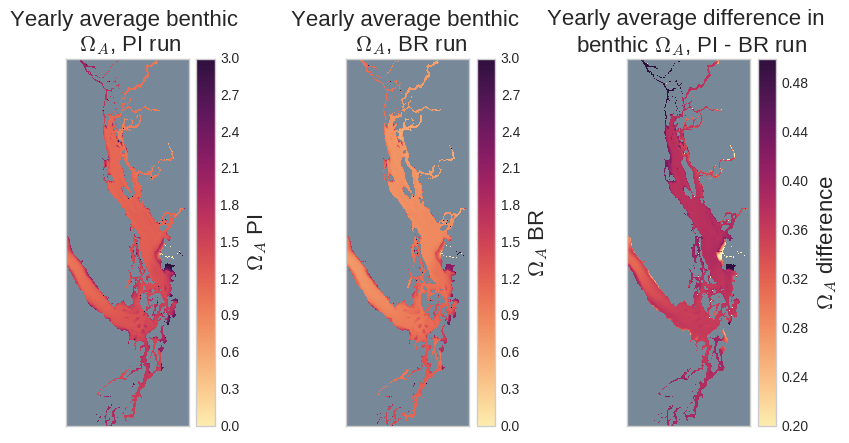

In [7]:
fact = 0.7
tf = 16
tcmap = cm.cm.matter

fig = plt.figure(figsize=(12*fact,6.5*fact))

##preindustrial
ax1 = fig.add_subplot(1,3,1)
tplt = np.ma.masked_values(PI_OmA_year_benthos_avg,0)
mesh = ax1.pcolormesh(tplt, cmap=tcmap, vmin=0, vmax=3)
viz_tools.plot_land_mask(ax1, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax1.set_title('Yearly average benthic \n $\Omega_A$, PI run', fontsize = tf)
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('$\Omega_A$ PI', fontsize = tf)
plt.xticks([])
plt.yticks([])

##presentday
ax1 = fig.add_subplot(1,3,2)
tplt = np.ma.masked_values(BR_OmA_year_benthos_avg,0)
mesh = ax1.pcolormesh(tplt, cmap=tcmap, vmin=0, vmax=3)
viz_tools.plot_land_mask(ax1, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax1.set_title('Yearly average benthic \n $\Omega_A$, BR run', fontsize = tf)
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('$\Omega_A$ BR', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(1,3,3)
tplt = np.ma.masked_values(PI_OmA_year_benthos_avg,0) -\
np.ma.masked_values(BR_OmA_year_benthos_avg,0) 
mesh = ax1.pcolormesh(tplt, cmap=tcmap, vmin=0.2, vmax=0.5)
viz_tools.plot_land_mask(ax1, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax1.set_title('Yearly average difference in \n benthic $\Omega_A$, PI - BR run', fontsize = tf)
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('$\Omega_A$ difference', fontsize = tf)
plt.xticks([])
plt.yticks([])

plt.tight_layout()

### Monthly averages of  $\Omega_A$ during three different seasons

A year is quite coarse - let's look at monthly averages during three times of year (April, August, and December).


In [8]:
PI_OmA_jan_benthos_avg = (PI_OmA_year_benthos_mbath[0,:,:])
BR_OmA_jan_benthos_avg = (BR_OmA_year_benthos_mbath[0,:,:])
PI_OmA_feb_benthos_avg = (PI_OmA_year_benthos_mbath[1,:,:])
BR_OmA_feb_benthos_avg = (BR_OmA_year_benthos_mbath[1,:,:])
PI_OmA_mar_benthos_avg = (PI_OmA_year_benthos_mbath[2,:,:])
BR_OmA_mar_benthos_avg = (BR_OmA_year_benthos_mbath[2,:,:])
PI_OmA_apr_benthos_avg = (PI_OmA_year_benthos_mbath[3,:,:])
BR_OmA_apr_benthos_avg = (BR_OmA_year_benthos_mbath[3,:,:])
PI_OmA_may_benthos_avg = (PI_OmA_year_benthos_mbath[4,:,:])
BR_OmA_may_benthos_avg = (BR_OmA_year_benthos_mbath[4,:,:])
PI_OmA_jun_benthos_avg = (PI_OmA_year_benthos_mbath[5,:,:])
BR_OmA_jun_benthos_avg = (BR_OmA_year_benthos_mbath[5,:,:])
PI_OmA_jul_benthos_avg = (PI_OmA_year_benthos_mbath[6,:,:])
BR_OmA_jul_benthos_avg = (BR_OmA_year_benthos_mbath[6,:,:])
PI_OmA_aug_benthos_avg = (PI_OmA_year_benthos_mbath[7,:,:])
BR_OmA_aug_benthos_avg = (BR_OmA_year_benthos_mbath[7,:,:])
PI_OmA_sep_benthos_avg = (PI_OmA_year_benthos_mbath[8,:,:])
BR_OmA_sep_benthos_avg = (BR_OmA_year_benthos_mbath[8,:,:])
PI_OmA_oct_benthos_avg = (PI_OmA_year_benthos_mbath[9,:,:])
BR_OmA_oct_benthos_avg = (BR_OmA_year_benthos_mbath[9,:,:])
PI_OmA_nov_benthos_avg = (PI_OmA_year_benthos_mbath[10,:,:])
BR_OmA_nov_benthos_avg = (BR_OmA_year_benthos_mbath[10,:,:])
PI_OmA_dec_benthos_avg = (PI_OmA_year_benthos_mbath[11,:,:])
BR_OmA_dec_benthos_avg = (BR_OmA_year_benthos_mbath[11,:,:])


In [9]:
list_BR_arrays = [BR_OmA_jan_benthos_avg,BR_OmA_feb_benthos_avg,BR_OmA_mar_benthos_avg,\
                 BR_OmA_apr_benthos_avg,BR_OmA_may_benthos_avg,BR_OmA_jun_benthos_avg,\
                 BR_OmA_jul_benthos_avg,BR_OmA_aug_benthos_avg,BR_OmA_sep_benthos_avg,\
                 BR_OmA_oct_benthos_avg,BR_OmA_nov_benthos_avg,BR_OmA_dec_benthos_avg]
list_PI_arrays = [PI_OmA_jan_benthos_avg,PI_OmA_feb_benthos_avg,PI_OmA_mar_benthos_avg,\
                 PI_OmA_apr_benthos_avg,PI_OmA_may_benthos_avg,PI_OmA_jun_benthos_avg,\
                 PI_OmA_jul_benthos_avg,PI_OmA_aug_benthos_avg,PI_OmA_sep_benthos_avg,\
                 PI_OmA_oct_benthos_avg,PI_OmA_nov_benthos_avg,PI_OmA_dec_benthos_avg]

#check that they're all different
# for i in range(0,len(list_BR_arrays)):
#     t_array_BR = list_BR_arrays[i]
#     print(t_array_BR[250,250])
    
# for i in range(0,len(list_PI_arrays)):
#     t_array_PI = list_PI_arrays[i]
#     print(t_array_PI[250,250])
    

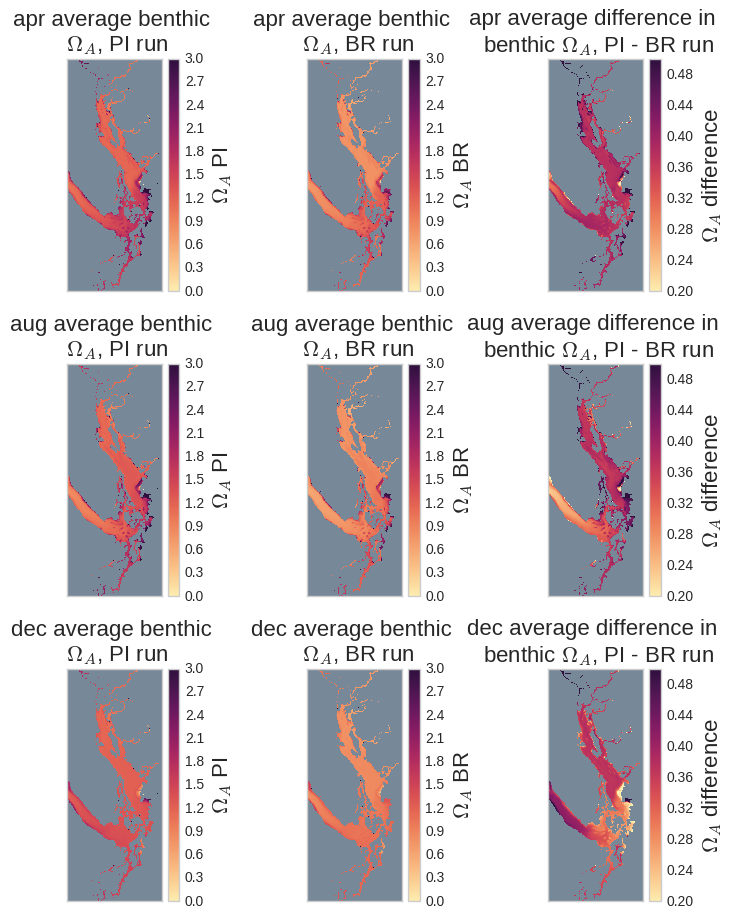

In [10]:
maxdif = 0.5
mindif = 0.2
fact = 0.6
tf = 16
xsiz = 12
ysiz = 15.5
tcmap = cm.cm.matter

fig = plt.figure(figsize=(xsiz*fact,ysiz*fact))

##preindustrial
ax1 = fig.add_subplot(3,3,1)
tplt = np.ma.masked_values(PI_OmA_apr_benthos_avg,0)
mesh = ax1.pcolormesh(tplt, cmap=tcmap, vmin=0, vmax=3)
viz_tools.plot_land_mask(ax1, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax1.set_title('apr average benthic \n $\Omega_A$, PI run', fontsize = tf)
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('$\Omega_A$ PI', fontsize = tf)
plt.xticks([])
plt.yticks([])

##presentday
ax1 = fig.add_subplot(3,3,2)
tplt = np.ma.masked_values(BR_OmA_apr_benthos_avg,0)
mesh = ax1.pcolormesh(tplt, cmap=tcmap, vmin=0, vmax=3)
viz_tools.plot_land_mask(ax1, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax1.set_title('apr average benthic \n $\Omega_A$, BR run', fontsize = tf)
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('$\Omega_A$ BR', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(3,3,3)
tplt = np.ma.masked_values(PI_OmA_apr_benthos_avg,0) -\
np.ma.masked_values(BR_OmA_apr_benthos_avg,0) 
mesh = ax1.pcolormesh(tplt, cmap=tcmap, vmin=mindif, vmax=maxdif)
viz_tools.plot_land_mask(ax1, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax1.set_title('apr average difference in \n benthic $\Omega_A$, PI - BR run', fontsize = tf)
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('$\Omega_A$ difference', fontsize = tf)
plt.xticks([])
plt.yticks([])

#august 
ax1 = fig.add_subplot(3,3,4)
tplt = np.ma.masked_values(PI_OmA_aug_benthos_avg,0)
mesh = ax1.pcolormesh(tplt, cmap=tcmap, vmin=0, vmax=3)
viz_tools.plot_land_mask(ax1, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax1.set_title('aug average benthic \n $\Omega_A$, PI run', fontsize = tf)
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('$\Omega_A$ PI', fontsize = tf)
plt.xticks([])
plt.yticks([])

##presentday
ax1 = fig.add_subplot(3,3,5)
tplt = np.ma.masked_values(BR_OmA_aug_benthos_avg,0)
mesh = ax1.pcolormesh(tplt, cmap=tcmap, vmin=0, vmax=3)
viz_tools.plot_land_mask(ax1, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax1.set_title('aug average benthic \n $\Omega_A$, BR run', fontsize = tf)
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('$\Omega_A$ BR', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(3,3,6)
tplt = np.ma.masked_values(PI_OmA_aug_benthos_avg,0) -\
np.ma.masked_values(BR_OmA_aug_benthos_avg,0) 
mesh = ax1.pcolormesh(tplt, cmap=tcmap, vmin=mindif, vmax=maxdif)
viz_tools.plot_land_mask(ax1, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax1.set_title('aug average difference in \n benthic $\Omega_A$, PI - BR run', fontsize = tf)
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('$\Omega_A$ difference', fontsize = tf)
plt.xticks([])
plt.yticks([])

#dec
ax1 = fig.add_subplot(3,3,7)
tplt = np.ma.masked_values(PI_OmA_dec_benthos_avg,0)
mesh = ax1.pcolormesh(tplt, cmap=tcmap, vmin=0, vmax=3)
viz_tools.plot_land_mask(ax1, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax1.set_title('dec average benthic \n $\Omega_A$, PI run', fontsize = tf)
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('$\Omega_A$ PI', fontsize = tf)
plt.xticks([])
plt.yticks([])

##presentday
ax1 = fig.add_subplot(3,3,8)
tplt = np.ma.masked_values(BR_OmA_dec_benthos_avg,0)
mesh = ax1.pcolormesh(tplt, cmap=tcmap, vmin=0, vmax=3)
viz_tools.plot_land_mask(ax1, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax1.set_title('dec average benthic \n $\Omega_A$, BR run', fontsize = tf)
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('$\Omega_A$ BR', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(3,3,9)
tplt = np.ma.masked_values(PI_OmA_dec_benthos_avg,0) -\
np.ma.masked_values(BR_OmA_dec_benthos_avg,0) 
mesh = ax1.pcolormesh(tplt, cmap=tcmap, vmin=mindif, vmax=maxdif)
viz_tools.plot_land_mask(ax1, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax1.set_title('dec average difference in \n benthic $\Omega_A$, PI - BR run', fontsize = tf)
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('$\Omega_A$ difference', fontsize = tf)
plt.xticks([])
plt.yticks([])

plt.tight_layout()

### Reinterpreting these maps - histograms

To get a more quantitative look at these $\Omega_A$ distributions, let's look at histograms of monthly average benthic $\Omega_A$ for the two scenarios.

In [11]:
#make a manual histogramming code
step = 0.2
t_start = 0
t_end = 3
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres = np.arange(t_start+step/2,t_end + step/2 ,step)
bin_prop = np.zeros_like(bin_centres)

def manual_hist(test_hist):
    for i in range(0,len(bin_starts)):
        obs_in_bin = test_hist[((test_hist>=bin_starts[i]) &\
                               (test_hist<bin_ends[i]))]

        bin_prop[i] = np.size(obs_in_bin)/np.size(test_hist)
    return bin_prop
        
PI_OmA_year_benthos_ocean = \
PI_OmA_year_benthos_avg[PI_OmA_year_benthos_avg<1e10]
bin_propPI  = manual_hist(PI_OmA_year_benthos_ocean)
t_PI_year = np.copy(bin_propPI)
BR_OmA_year_benthos_ocean = \
BR_OmA_year_benthos_avg[BR_OmA_year_benthos_avg<1e10]
bin_propBR  = manual_hist(BR_OmA_year_benthos_ocean)
t_BR_year = np.copy(bin_propBR)



In [12]:
PI_OmA_jan_benthos_ocean = \
PI_OmA_jan_benthos_avg[PI_OmA_jan_benthos_avg<1e10]
bin_propPI  = manual_hist(PI_OmA_jan_benthos_ocean)
t_PI_jan = np.copy(bin_propPI)
BR_OmA_jan_benthos_ocean = \
BR_OmA_jan_benthos_avg[BR_OmA_jan_benthos_avg<1e10]
bin_propBR  = manual_hist(BR_OmA_jan_benthos_ocean)
t_BR_jan = np.copy(bin_propBR)
PI_OmA_feb_benthos_ocean = \
PI_OmA_feb_benthos_avg[PI_OmA_feb_benthos_avg<1e10]
bin_propPI  = manual_hist(PI_OmA_feb_benthos_ocean)
t_PI_feb = np.copy(bin_propPI)
BR_OmA_feb_benthos_ocean = \
BR_OmA_feb_benthos_avg[BR_OmA_feb_benthos_avg<1e10]
bin_propBR  = manual_hist(BR_OmA_feb_benthos_ocean)
t_BR_feb = np.copy(bin_propBR)
PI_OmA_mar_benthos_ocean = \
PI_OmA_mar_benthos_avg[PI_OmA_mar_benthos_avg<1e10]
bin_propPI  = manual_hist(PI_OmA_mar_benthos_ocean)
t_PI_mar = np.copy(bin_propPI)
BR_OmA_mar_benthos_ocean = \
BR_OmA_mar_benthos_avg[BR_OmA_mar_benthos_avg<1e10]
bin_propBR  = manual_hist(BR_OmA_mar_benthos_ocean)
t_BR_mar = np.copy(bin_propBR)
PI_OmA_apr_benthos_ocean = \
PI_OmA_apr_benthos_avg[PI_OmA_apr_benthos_avg<1e10]
bin_propPI  = manual_hist(PI_OmA_apr_benthos_ocean)
t_PI_apr = np.copy(bin_propPI)
BR_OmA_apr_benthos_ocean = \
BR_OmA_apr_benthos_avg[BR_OmA_apr_benthos_avg<1e10]
bin_propBR  = manual_hist(BR_OmA_apr_benthos_ocean)
t_BR_apr = np.copy(bin_propBR)
PI_OmA_may_benthos_ocean = \
PI_OmA_may_benthos_avg[PI_OmA_may_benthos_avg<1e10]
bin_propPI  = manual_hist(PI_OmA_may_benthos_ocean)
t_PI_may = np.copy(bin_propPI)
BR_OmA_may_benthos_ocean = \
BR_OmA_may_benthos_avg[BR_OmA_may_benthos_avg<1e10]
bin_propBR  = manual_hist(BR_OmA_may_benthos_ocean)
t_BR_may = np.copy(bin_propBR)
PI_OmA_jun_benthos_ocean = \
PI_OmA_jun_benthos_avg[PI_OmA_jun_benthos_avg<1e10]
bin_propPI  = manual_hist(PI_OmA_jun_benthos_ocean)
t_PI_jun = np.copy(bin_propPI)
BR_OmA_jun_benthos_ocean = \
BR_OmA_jun_benthos_avg[BR_OmA_jun_benthos_avg<1e10]
bin_propBR  = manual_hist(BR_OmA_jun_benthos_ocean)
t_BR_jun = np.copy(bin_propBR)
PI_OmA_jul_benthos_ocean = \
PI_OmA_jul_benthos_avg[PI_OmA_jul_benthos_avg<1e10]
bin_propPI  = manual_hist(PI_OmA_jul_benthos_ocean)
t_PI_jul = np.copy(bin_propPI)
BR_OmA_jul_benthos_ocean = \
BR_OmA_jul_benthos_avg[BR_OmA_jul_benthos_avg<1e10]
bin_propBR  = manual_hist(BR_OmA_jul_benthos_ocean)
t_BR_jul = np.copy(bin_propBR)
PI_OmA_aug_benthos_ocean = \
PI_OmA_aug_benthos_avg[PI_OmA_aug_benthos_avg<1e10]
bin_propPI  = manual_hist(PI_OmA_aug_benthos_ocean)
t_PI_aug = np.copy(bin_propPI)
BR_OmA_aug_benthos_ocean = \
BR_OmA_aug_benthos_avg[BR_OmA_aug_benthos_avg<1e10]
bin_propBR  = manual_hist(BR_OmA_aug_benthos_ocean)
t_BR_aug = np.copy(bin_propBR)
PI_OmA_sep_benthos_ocean = \
PI_OmA_sep_benthos_avg[PI_OmA_sep_benthos_avg<1e10]
bin_propPI  = manual_hist(PI_OmA_sep_benthos_ocean)
t_PI_sep = np.copy(bin_propPI)
BR_OmA_sep_benthos_ocean = \
BR_OmA_sep_benthos_avg[BR_OmA_sep_benthos_avg<1e10]
bin_propBR  = manual_hist(BR_OmA_sep_benthos_ocean)
t_BR_sep = np.copy(bin_propBR)
PI_OmA_oct_benthos_ocean = \
PI_OmA_oct_benthos_avg[PI_OmA_oct_benthos_avg<1e10]
bin_propPI  = manual_hist(PI_OmA_oct_benthos_ocean)
t_PI_oct = np.copy(bin_propPI)
BR_OmA_oct_benthos_ocean = \
BR_OmA_oct_benthos_avg[BR_OmA_oct_benthos_avg<1e10]
bin_propBR  = manual_hist(BR_OmA_oct_benthos_ocean)
t_BR_oct = np.copy(bin_propBR)
PI_OmA_nov_benthos_ocean = \
PI_OmA_nov_benthos_avg[PI_OmA_nov_benthos_avg<1e10]
bin_propPI  = manual_hist(PI_OmA_nov_benthos_ocean)
t_PI_nov = np.copy(bin_propPI)
BR_OmA_nov_benthos_ocean = \
BR_OmA_nov_benthos_avg[BR_OmA_nov_benthos_avg<1e10]
bin_propBR  = manual_hist(BR_OmA_nov_benthos_ocean)
t_BR_nov = np.copy(bin_propBR)
PI_OmA_dec_benthos_ocean = \
PI_OmA_dec_benthos_avg[PI_OmA_dec_benthos_avg<1e10]
bin_propPI  = manual_hist(PI_OmA_dec_benthos_ocean)
t_PI_dec = np.copy(bin_propPI)
BR_OmA_dec_benthos_ocean = \
BR_OmA_dec_benthos_avg[BR_OmA_dec_benthos_avg<1e10]
bin_propBR  = manual_hist(BR_OmA_dec_benthos_ocean)
t_BR_dec = np.copy(bin_propBR)

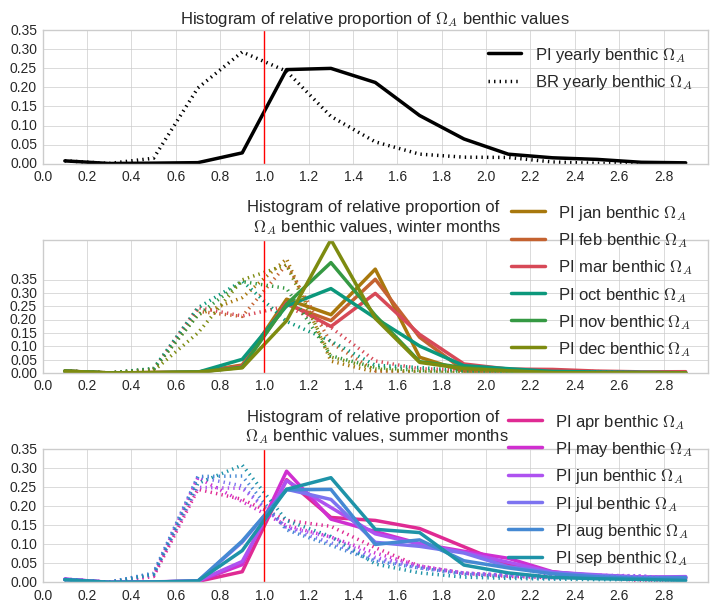

In [13]:
tcm = cm.cm.phase
# d = 
# # tcm(1.*d/12)

fact = 0.52
fig = plt.figure(figsize=(14*fact,12*fact))
lw = 2.5
ax1 = fig.add_subplot(3,1,1)
ax1.plot(bin_centres,t_PI_year,\
        color = 'black',linewidth = lw, label = 'PI yearly benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_year,\
        color = 'black',linewidth = lw, linestyle = ':', \
        label = 'BR yearly benthic $\Omega_A$')
ax1.legend(loc = 'upper right')
ax1.set_title('Histogram of relative proportion of $\Omega_A$ benthic values')
plt.axvline(x=1, color = 'red')
w = ax1.set_xticks(np.arange(0, 3, step=0.2))
w = ax1.set_yticks(np.arange(0, 0.4, step=0.05))

ax1 = fig.add_subplot(3,1,2)
#months
ax1.plot(bin_centres,t_PI_jan,\
        color = tcm(1.*0/12),linewidth = lw, label = 'PI jan benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_jan,\
        color = tcm(1.*0/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_feb,\
        color = tcm(1.*1/12),linewidth = lw, label = 'PI feb benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_feb,\
        color = tcm(1.*1/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_mar,\
        color = tcm(1.*2/12),linewidth = lw, label = 'PI mar benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_mar,\
        color = tcm(1.*2/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_oct,\
        color = tcm(1.*9/12),linewidth = lw, label = 'PI oct benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_oct,\
        color = tcm(1.*9/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_nov,\
        color = tcm(1.*10/12),linewidth = lw, label = 'PI nov benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_nov,\
        color = tcm(1.*10/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_dec,\
        color = tcm(1.*11/12),linewidth = lw, label = 'PI dec benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_dec,\
        color = tcm(1.*11/12),linewidth = lw, linestyle = ':')
#
ax1.legend(loc = 'best')
ax1.set_title('Histogram of relative proportion of \n $\Omega_A$ benthic values, winter months ')
plt.axvline(x=1, color = 'red')
w = ax1.set_xticks(np.arange(0, 3, step=0.2))
w = ax1.set_yticks(np.arange(0, 0.4, step=0.05))

##
ax1 = fig.add_subplot(3,1,3)
ax1.plot(bin_centres,t_PI_apr,\
        color = tcm(1.*3/12),linewidth = lw, label = 'PI apr benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_apr,\
        color = tcm(1.*3/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_may,\
        color = tcm(1.*4/12),linewidth = lw, label = 'PI may benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_may,\
        color = tcm(1.*4/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_jun,\
        color = tcm(1.*5/12),linewidth = lw, label = 'PI jun benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_jun,\
        color = tcm(1.*5/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_jul,\
        color = tcm(1.*6/12),linewidth = lw, label = 'PI jul benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_jul,\
        color = tcm(1.*6/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_aug,\
        color = tcm(1.*7/12),linewidth = lw, label = 'PI aug benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_aug,\
        color = tcm(1.*7/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_sep,\
        color = tcm(1.*8/12),linewidth = lw, label = 'PI sep benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_sep,\
        color = tcm(1.*8/12),linewidth = lw, linestyle = ':')

ax1.legend(loc = 'best')
ax1.set_title('Histogram of relative proportion of \n $\Omega_A$ benthic values, summer months ')
plt.axvline(x=1, color = 'red')
w = ax1.set_xticks(np.arange(0, 3, step=0.2))
w = ax1.set_yticks(np.arange(0, 0.4, step=0.05))

plt.tight_layout()

### Considering thresholds
##### Green parts of the map represent viable habitat.

Clearly, $\Omega_A$ varies dramatically during the year. What does this mean for viable habitat? That largely depends on which $\Omega_A$ value we choose as a threshold. Here are some maps of viable habitat for the PI and BR cases at different thresholds: 0.5, 1, and 1.5. I also make line plots of [percent of the benthos that is viable] vs [threshold $\Omega_A$ value] and [percent of preindustrial viable habitat that has been lost] vs [threshold $\Omega_A$ value], monthly, for the two scenarios.

##### $\Omega_A$ threshold for viable habitat = 0.5

In [14]:
cell_counter = np.zeros_like(BR_OmA_dec_benthos_avg)
cell_counter[BR_OmA_apr_benthos_avg>1e10] =1
total_habitable_cells = 898*398 - np.sum(cell_counter)

Omega A threshold for viable habitat is: 0.5
APRIL
% of benthic domain that is viable habitat in preindustrial scenario is: 99.12900692510887
% of benthic domain that is viable habitat in present-day scenario is: 99.07308250636586
% viable habitat lost from preindustrial to present-day is: 0.05641579642299844

AUGUST
% of benthic domain that is viable habitat in preindustrial scenario is: 99.22300754384712
% of benthic domain that is viable habitat in present-day scenario is: 99.0671331001166
% viable habitat lost from preindustrial to present-day is: 0.15709506049958627

DECEMBER
% of benthic domain that is viable habitat in preindustrial scenario is: 99.20753908759906
% of benthic domain that is viable habitat in present-day scenario is: 99.05166464386855
% viable habitat lost from preindustrial to present-day is: 0.15711955478794856


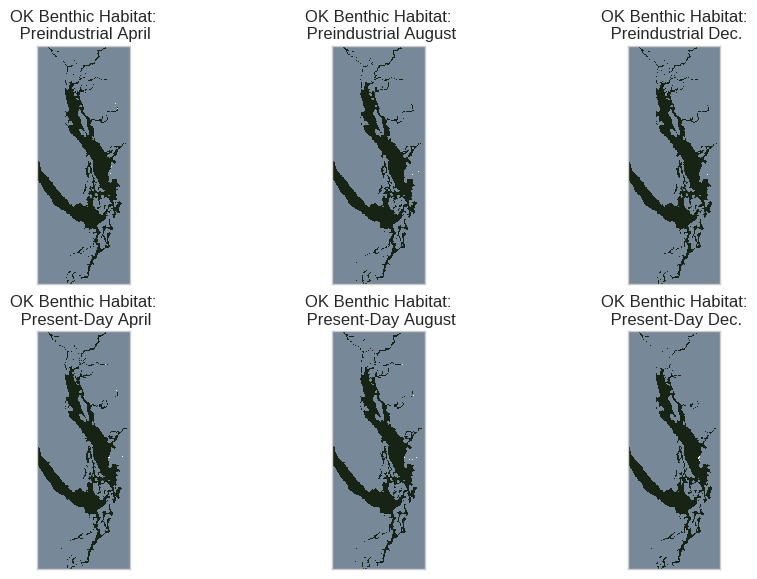

In [15]:
thres = 0.5

fact = 0.9
tf = 12
tcmap = cm.cm.speed
tvmin = -1
tvmax = 1

fig = plt.figure(figsize=(12*fact,7.5*fact))

ax = fig.add_subplot(2,3,1)
#tplt = np.ma.masked_values(PI_OmA_apr_benthos_avg,0)
PI_OmA_apr_benthos_avg_H = np.copy(PI_OmA_apr_benthos_avg)
w = np.where((PI_OmA_apr_benthos_avg>thres) & (PI_OmA_apr_benthos_avg<1e19))
PI_OmA_apr_benthos_avg_H[w]=1
w2 = np.where((PI_OmA_apr_benthos_avg<thres))
PI_OmA_apr_benthos_avg_H[w2]=-1
tplt = PI_OmA_apr_benthos_avg_H
mesh = ax.pcolormesh(PI_OmA_apr_benthos_avg_H, cmap=tcmap, vmin=tvmin, vmax=tvmax)
viz_tools.set_aspect(ax)
viz_tools.plot_land_mask(ax, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax.set_title('OK Benthic Habitat:\n Preindustrial April', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(2,3,2)
PI_OmA_aug_benthos_avg_H = np.copy(PI_OmA_aug_benthos_avg)
w = np.where((PI_OmA_aug_benthos_avg>thres) & (PI_OmA_aug_benthos_avg<1e19))
PI_OmA_aug_benthos_avg_H[w]=1
w2 = np.where((PI_OmA_aug_benthos_avg<thres))
PI_OmA_aug_benthos_avg_H[w2]=-1
tplt = PI_OmA_aug_benthos_avg_H
mesh = ax.pcolormesh(PI_OmA_aug_benthos_avg_H, cmap=tcmap, vmin=tvmin, vmax=tvmax)
viz_tools.set_aspect(ax)
viz_tools.plot_land_mask(ax, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax.set_title('OK Benthic Habitat:\n Preindustrial August', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(2,3,3)
PI_OmA_dec_benthos_avg_H = np.copy(PI_OmA_dec_benthos_avg)
w = np.where((PI_OmA_dec_benthos_avg>thres) & (PI_OmA_dec_benthos_avg<1e19))
PI_OmA_dec_benthos_avg_H[w]=1
w2 = np.where((PI_OmA_dec_benthos_avg<thres))
PI_OmA_dec_benthos_avg_H[w2]=-1
tplt = PI_OmA_dec_benthos_avg_H
mesh = ax.pcolormesh(PI_OmA_dec_benthos_avg_H, cmap=tcmap, vmin=tvmin, vmax=tvmax)
viz_tools.set_aspect(ax)
viz_tools.plot_land_mask(ax, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax.set_title('OK Benthic Habitat:\n Preindustrial Dec.', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(2,3,4)
#tplt = np.ma.masked_values(BR_OmA_apr_benthos_avg,0)
BR_OmA_apr_benthos_avg_H = np.copy(BR_OmA_apr_benthos_avg)
w = np.where((BR_OmA_apr_benthos_avg>thres) & (BR_OmA_apr_benthos_avg<1e19))
BR_OmA_apr_benthos_avg_H[w]=1
w2 = np.where((BR_OmA_apr_benthos_avg<thres))
BR_OmA_apr_benthos_avg_H[w2]=-1
tplt = BR_OmA_apr_benthos_avg_H
mesh = ax.pcolormesh(BR_OmA_apr_benthos_avg_H, cmap=tcmap, vmin=tvmin, vmax=tvmax)
viz_tools.set_aspect(ax)
viz_tools.plot_land_mask(ax, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax.set_title('OK Benthic Habitat:\n Present-Day April', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(2,3,5)
BR_OmA_aug_benthos_avg_H = np.copy(BR_OmA_aug_benthos_avg)
w = np.where((BR_OmA_aug_benthos_avg>thres) & (BR_OmA_aug_benthos_avg<1e19))
BR_OmA_aug_benthos_avg_H[w]=1
w2 = np.where((BR_OmA_aug_benthos_avg<thres))
BR_OmA_aug_benthos_avg_H[w2]=-1
tplt = BR_OmA_aug_benthos_avg_H
mesh = ax.pcolormesh(BR_OmA_aug_benthos_avg_H, cmap=tcmap, vmin=tvmin, vmax=tvmax)
viz_tools.set_aspect(ax)
viz_tools.plot_land_mask(ax, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax.set_title('OK Benthic Habitat:\n Present-Day August', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(2,3,6)
BR_OmA_dec_benthos_avg_H = np.copy(BR_OmA_dec_benthos_avg)
w = np.where((BR_OmA_dec_benthos_avg>thres) & (BR_OmA_dec_benthos_avg<1e19))
BR_OmA_dec_benthos_avg_H[w]=1
w2 = np.where((BR_OmA_dec_benthos_avg<thres))
BR_OmA_dec_benthos_avg_H[w2]=-1
tplt = BR_OmA_dec_benthos_avg_H
mesh = ax.pcolormesh(BR_OmA_dec_benthos_avg_H, cmap=tcmap, vmin=tvmin, vmax=tvmax)
viz_tools.set_aspect(ax)
viz_tools.plot_land_mask(ax, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'lightslategrey')
ax.set_title('OK Benthic Habitat:\n Present-Day Dec.', fontsize = tf)
plt.xticks([])
plt.yticks([])

PI_OmA_apr_benthos_avg_H2 = np.zeros_like(PI_OmA_apr_benthos_avg_H)
PI_OmA_aug_benthos_avg_H2 = np.zeros_like(PI_OmA_aug_benthos_avg_H)
PI_OmA_dec_benthos_avg_H2 = np.zeros_like(PI_OmA_dec_benthos_avg_H)
BR_OmA_apr_benthos_avg_H2 = np.zeros_like(BR_OmA_apr_benthos_avg_H)
BR_OmA_aug_benthos_avg_H2 = np.zeros_like(BR_OmA_aug_benthos_avg_H)
BR_OmA_dec_benthos_avg_H2 = np.zeros_like(BR_OmA_dec_benthos_avg_H)

PI_OmA_apr_benthos_avg_H2[PI_OmA_apr_benthos_avg_H==1]=1
PI_OmA_aug_benthos_avg_H2[PI_OmA_aug_benthos_avg_H==1]=1
PI_OmA_dec_benthos_avg_H2[PI_OmA_dec_benthos_avg_H==1]=1
BR_OmA_apr_benthos_avg_H2[BR_OmA_apr_benthos_avg_H==1]=1
BR_OmA_aug_benthos_avg_H2[BR_OmA_aug_benthos_avg_H==1]=1
BR_OmA_dec_benthos_avg_H2[BR_OmA_dec_benthos_avg_H==1]=1

print('Omega A threshold for viable habitat is: '+str((thres)))
print('APRIL')
print('% of benthic domain that is viable habitat in preindustrial scenario is: ' + \
str(100*np.sum(PI_OmA_apr_benthos_avg_H2)/total_habitable_cells))
print('% of benthic domain that is viable habitat in present-day scenario is: '+ \
str(100*np.sum(BR_OmA_apr_benthos_avg_H2)/total_habitable_cells))
print('% viable habitat lost from preindustrial to present-day is: '+\
str(100*(np.sum(PI_OmA_apr_benthos_avg_H2)\
           -np.sum(BR_OmA_apr_benthos_avg_H2))/np.sum(PI_OmA_apr_benthos_avg_H2)))
print('')
print('AUGUST')
print('% of benthic domain that is viable habitat in preindustrial scenario is: ' + \
str(100*np.sum(PI_OmA_aug_benthos_avg_H2)/total_habitable_cells))
print('% of benthic domain that is viable habitat in present-day scenario is: '+ \
str(100*np.sum(BR_OmA_aug_benthos_avg_H2)/total_habitable_cells))
print('% viable habitat lost from preindustrial to present-day is: '+\
str(100*(np.sum(PI_OmA_aug_benthos_avg_H2)\
           -np.sum(BR_OmA_aug_benthos_avg_H2))/np.sum(PI_OmA_aug_benthos_avg_H2)))
print('')
print('DECEMBER')
print('% of benthic domain that is viable habitat in preindustrial scenario is: ' + \
str(100*np.sum(PI_OmA_dec_benthos_avg_H2)/total_habitable_cells))
print('% of benthic domain that is viable habitat in present-day scenario is: '+ \
str(100*np.sum(BR_OmA_dec_benthos_avg_H2)/total_habitable_cells))
print('% viable habitat lost from preindustrial to present-day is: '+\
str(100*(np.sum(PI_OmA_dec_benthos_avg_H2)\
           -np.sum(BR_OmA_dec_benthos_avg_H2))/np.sum(PI_OmA_dec_benthos_avg_H2)))

##### $\Omega_A$ threshold for viable habitat = 1

Omega A threshold for viable habitat is: 1.0
APRIL
% of benthic domain that is viable habitat in preindustrial scenario is: 95.95083410675615
% of benthic domain that is viable habitat in present-day scenario is: 51.45046524356869
% viable habitat lost from preindustrial to present-day is: 46.3783033023723

AUGUST
% of benthic domain that is viable habitat in preindustrial scenario is: 87.89652792651293
% of benthic domain that is viable habitat in present-day scenario is: 41.10444777611195
% viable habitat lost from preindustrial to present-day is: 53.235413564369836

DECEMBER
% of benthic domain that is viable habitat in preindustrial scenario is: 96.78494086290188
% of benthic domain that is viable habitat in present-day scenario is: 48.45434425644321
% viable habitat lost from preindustrial to present-day is: 49.936070813867715


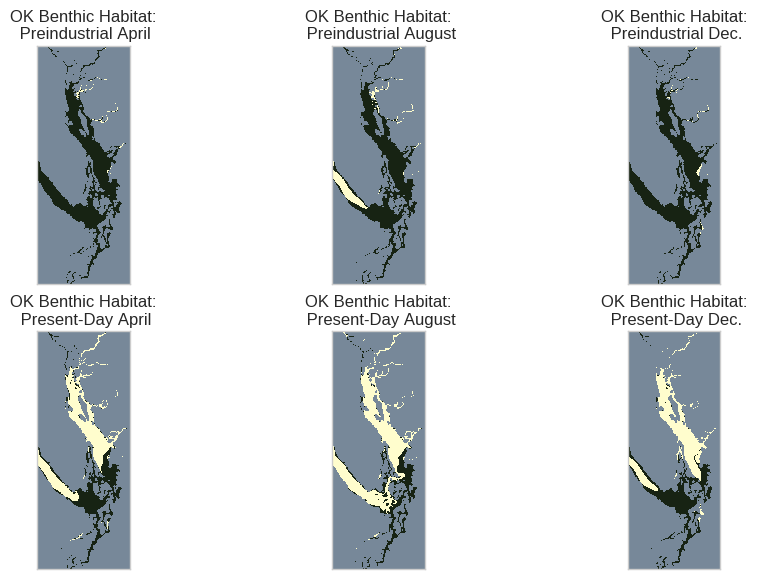

In [16]:
thres = 1.0

fact = 0.9
tf = 12
tcmap = cm.cm.speed
tvmin = -1
tvmax = 1

fig = plt.figure(figsize=(12*fact,7.5*fact))

ax = fig.add_subplot(2,3,1)
#tplt = np.ma.masked_values(PI_OmA_apr_benthos_avg,0)
PI_OmA_apr_benthos_avg_H = np.copy(PI_OmA_apr_benthos_avg)
w = np.where((PI_OmA_apr_benthos_avg>thres) & (PI_OmA_apr_benthos_avg<1e19))
PI_OmA_apr_benthos_avg_H[w]=1
w2 = np.where((PI_OmA_apr_benthos_avg<thres))
PI_OmA_apr_benthos_avg_H[w2]=-1
tplt = PI_OmA_apr_benthos_avg_H
mesh = ax.pcolormesh(PI_OmA_apr_benthos_avg_H, cmap=tcmap, vmin=tvmin, vmax=tvmax)
viz_tools.set_aspect(ax)
viz_tools.plot_land_mask(ax, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax.set_title('OK Benthic Habitat:\n Preindustrial April', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(2,3,2)
PI_OmA_aug_benthos_avg_H = np.copy(PI_OmA_aug_benthos_avg)
w = np.where((PI_OmA_aug_benthos_avg>thres) & (PI_OmA_aug_benthos_avg<1e19))
PI_OmA_aug_benthos_avg_H[w]=1
w2 = np.where((PI_OmA_aug_benthos_avg<thres))
PI_OmA_aug_benthos_avg_H[w2]=-1
tplt = PI_OmA_aug_benthos_avg_H
mesh = ax.pcolormesh(PI_OmA_aug_benthos_avg_H, cmap=tcmap, vmin=tvmin, vmax=tvmax)
viz_tools.set_aspect(ax)
viz_tools.plot_land_mask(ax, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax.set_title('OK Benthic Habitat:\n Preindustrial August', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(2,3,3)
PI_OmA_dec_benthos_avg_H = np.copy(PI_OmA_dec_benthos_avg)
w = np.where((PI_OmA_dec_benthos_avg>thres) & (PI_OmA_dec_benthos_avg<1e19))
PI_OmA_dec_benthos_avg_H[w]=1
w2 = np.where((PI_OmA_dec_benthos_avg<thres))
PI_OmA_dec_benthos_avg_H[w2]=-1
tplt = PI_OmA_dec_benthos_avg_H
mesh = ax.pcolormesh(PI_OmA_dec_benthos_avg_H, cmap=tcmap, vmin=tvmin, vmax=tvmax)
viz_tools.set_aspect(ax)
viz_tools.plot_land_mask(ax, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax.set_title('OK Benthic Habitat:\n Preindustrial Dec.', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(2,3,4)
#tplt = np.ma.masked_values(BR_OmA_apr_benthos_avg,0)
BR_OmA_apr_benthos_avg_H = np.copy(BR_OmA_apr_benthos_avg)
w = np.where((BR_OmA_apr_benthos_avg>thres) & (BR_OmA_apr_benthos_avg<1e19))
BR_OmA_apr_benthos_avg_H[w]=1
w2 = np.where((BR_OmA_apr_benthos_avg<thres))
BR_OmA_apr_benthos_avg_H[w2]=-1
tplt = BR_OmA_apr_benthos_avg_H
mesh = ax.pcolormesh(BR_OmA_apr_benthos_avg_H, cmap=tcmap, vmin=tvmin, vmax=tvmax)
viz_tools.set_aspect(ax)
viz_tools.plot_land_mask(ax, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax.set_title('OK Benthic Habitat:\n Present-Day April', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(2,3,5)
BR_OmA_aug_benthos_avg_H = np.copy(BR_OmA_aug_benthos_avg)
w = np.where((BR_OmA_aug_benthos_avg>thres) & (BR_OmA_aug_benthos_avg<1e19))
BR_OmA_aug_benthos_avg_H[w]=1
w2 = np.where((BR_OmA_aug_benthos_avg<thres))
BR_OmA_aug_benthos_avg_H[w2]=-1
tplt = BR_OmA_aug_benthos_avg_H
mesh = ax.pcolormesh(BR_OmA_aug_benthos_avg_H, cmap=tcmap, vmin=tvmin, vmax=tvmax)
viz_tools.set_aspect(ax)
viz_tools.plot_land_mask(ax, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax.set_title('OK Benthic Habitat:\n Present-Day August', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(2,3,6)
BR_OmA_dec_benthos_avg_H = np.copy(BR_OmA_dec_benthos_avg)
w = np.where((BR_OmA_dec_benthos_avg>thres) & (BR_OmA_dec_benthos_avg<1e19))
BR_OmA_dec_benthos_avg_H[w]=1
w2 = np.where((BR_OmA_dec_benthos_avg<thres))
BR_OmA_dec_benthos_avg_H[w2]=-1
tplt = BR_OmA_dec_benthos_avg_H
mesh = ax.pcolormesh(BR_OmA_dec_benthos_avg_H, cmap=tcmap, vmin=tvmin, vmax=tvmax)
viz_tools.set_aspect(ax)
viz_tools.plot_land_mask(ax, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'lightslategrey')
ax.set_title('OK Benthic Habitat:\n Present-Day Dec.', fontsize = tf)
plt.xticks([])
plt.yticks([])

PI_OmA_apr_benthos_avg_H2 = np.zeros_like(PI_OmA_apr_benthos_avg_H)
PI_OmA_aug_benthos_avg_H2 = np.zeros_like(PI_OmA_aug_benthos_avg_H)
PI_OmA_dec_benthos_avg_H2 = np.zeros_like(PI_OmA_dec_benthos_avg_H)
BR_OmA_apr_benthos_avg_H2 = np.zeros_like(BR_OmA_apr_benthos_avg_H)
BR_OmA_aug_benthos_avg_H2 = np.zeros_like(BR_OmA_aug_benthos_avg_H)
BR_OmA_dec_benthos_avg_H2 = np.zeros_like(BR_OmA_dec_benthos_avg_H)

PI_OmA_apr_benthos_avg_H2[PI_OmA_apr_benthos_avg_H==1]=1
PI_OmA_aug_benthos_avg_H2[PI_OmA_aug_benthos_avg_H==1]=1
PI_OmA_dec_benthos_avg_H2[PI_OmA_dec_benthos_avg_H==1]=1
BR_OmA_apr_benthos_avg_H2[BR_OmA_apr_benthos_avg_H==1]=1
BR_OmA_aug_benthos_avg_H2[BR_OmA_aug_benthos_avg_H==1]=1
BR_OmA_dec_benthos_avg_H2[BR_OmA_dec_benthos_avg_H==1]=1

print('Omega A threshold for viable habitat is: '+str((thres)))
print('APRIL')
print('% of benthic domain that is viable habitat in preindustrial scenario is: ' + \
str(100*np.sum(PI_OmA_apr_benthos_avg_H2)/total_habitable_cells))
print('% of benthic domain that is viable habitat in present-day scenario is: '+ \
str(100*np.sum(BR_OmA_apr_benthos_avg_H2)/total_habitable_cells))
print('% viable habitat lost from preindustrial to present-day is: '+\
str(100*(np.sum(PI_OmA_apr_benthos_avg_H2)\
           -np.sum(BR_OmA_apr_benthos_avg_H2))/np.sum(PI_OmA_apr_benthos_avg_H2)))
print('')
print('AUGUST')
print('% of benthic domain that is viable habitat in preindustrial scenario is: ' + \
str(100*np.sum(PI_OmA_aug_benthos_avg_H2)/total_habitable_cells))
print('% of benthic domain that is viable habitat in present-day scenario is: '+ \
str(100*np.sum(BR_OmA_aug_benthos_avg_H2)/total_habitable_cells))
print('% viable habitat lost from preindustrial to present-day is: '+\
str(100*(np.sum(PI_OmA_aug_benthos_avg_H2)\
           -np.sum(BR_OmA_aug_benthos_avg_H2))/np.sum(PI_OmA_aug_benthos_avg_H2)))
print('')
print('DECEMBER')
print('% of benthic domain that is viable habitat in preindustrial scenario is: ' + \
str(100*np.sum(PI_OmA_dec_benthos_avg_H2)/total_habitable_cells))
print('% of benthic domain that is viable habitat in present-day scenario is: '+ \
str(100*np.sum(BR_OmA_dec_benthos_avg_H2)/total_habitable_cells))
print('% viable habitat lost from preindustrial to present-day is: '+\
str(100*(np.sum(PI_OmA_dec_benthos_avg_H2)\
           -np.sum(BR_OmA_dec_benthos_avg_H2))/np.sum(PI_OmA_dec_benthos_avg_H2)))

##### $\Omega_A$ threshold for viable habitat = 1.5

Omega A threshold for viable habitat is: 1.5
APRIL
% of benthic domain that is viable habitat in preindustrial scenario is: 44.712167725660976
% of benthic domain that is viable habitat in present-day scenario is: 15.623140810547108
% viable habitat lost from preindustrial to present-day is: 65.05841339117013

AUGUST
% of benthic domain that is viable habitat in preindustrial scenario is: 33.78548820827682
% of benthic domain that is viable habitat in present-day scenario is: 14.324980366959377
% viable habitat lost from preindustrial to present-day is: 57.60019722476579

DECEMBER
% of benthic domain that is viable habitat in preindustrial scenario is: 14.472525641940935
% of benthic domain that is viable habitat in present-day scenario is: 0.9899811998762523
% viable habitat lost from preindustrial to present-day is: 93.15958233988326


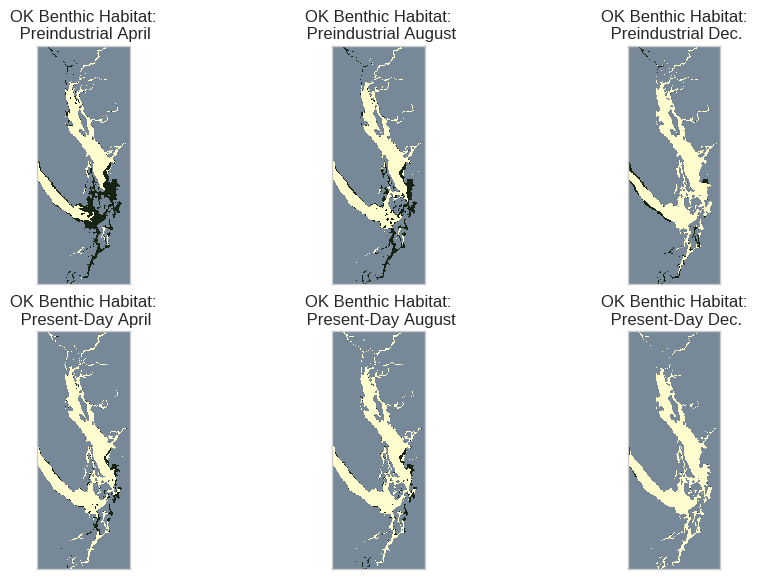

In [17]:
thres = 1.5

fact = 0.9
tf = 12
tcmap = cm.cm.speed
tvmin = -1
tvmax = 1

fig = plt.figure(figsize=(12*fact,7.5*fact))

ax = fig.add_subplot(2,3,1)
#tplt = np.ma.masked_values(PI_OmA_apr_benthos_avg,0)
PI_OmA_apr_benthos_avg_H = np.copy(PI_OmA_apr_benthos_avg)
w = np.where((PI_OmA_apr_benthos_avg>thres) & (PI_OmA_apr_benthos_avg<1e19))
PI_OmA_apr_benthos_avg_H[w]=1
w2 = np.where((PI_OmA_apr_benthos_avg<thres))
PI_OmA_apr_benthos_avg_H[w2]=-1
tplt = PI_OmA_apr_benthos_avg_H
mesh = ax.pcolormesh(PI_OmA_apr_benthos_avg_H, cmap=tcmap, vmin=tvmin, vmax=tvmax)
viz_tools.set_aspect(ax)
viz_tools.plot_land_mask(ax, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax.set_title('OK Benthic Habitat:\n Preindustrial April', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(2,3,2)
PI_OmA_aug_benthos_avg_H = np.copy(PI_OmA_aug_benthos_avg)
w = np.where((PI_OmA_aug_benthos_avg>thres) & (PI_OmA_aug_benthos_avg<1e19))
PI_OmA_aug_benthos_avg_H[w]=1
w2 = np.where((PI_OmA_aug_benthos_avg<thres))
PI_OmA_aug_benthos_avg_H[w2]=-1
tplt = PI_OmA_aug_benthos_avg_H
mesh = ax.pcolormesh(PI_OmA_aug_benthos_avg_H, cmap=tcmap, vmin=tvmin, vmax=tvmax)
viz_tools.set_aspect(ax)
viz_tools.plot_land_mask(ax, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax.set_title('OK Benthic Habitat:\n Preindustrial August', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(2,3,3)
PI_OmA_dec_benthos_avg_H = np.copy(PI_OmA_dec_benthos_avg)
w = np.where((PI_OmA_dec_benthos_avg>thres) & (PI_OmA_dec_benthos_avg<1e19))
PI_OmA_dec_benthos_avg_H[w]=1
w2 = np.where((PI_OmA_dec_benthos_avg<thres))
PI_OmA_dec_benthos_avg_H[w2]=-1
tplt = PI_OmA_dec_benthos_avg_H
mesh = ax.pcolormesh(PI_OmA_dec_benthos_avg_H, cmap=tcmap, vmin=tvmin, vmax=tvmax)
viz_tools.set_aspect(ax)
viz_tools.plot_land_mask(ax, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax.set_title('OK Benthic Habitat:\n Preindustrial Dec.', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(2,3,4)
#tplt = np.ma.masked_values(BR_OmA_apr_benthos_avg,0)
BR_OmA_apr_benthos_avg_H = np.copy(BR_OmA_apr_benthos_avg)
w = np.where((BR_OmA_apr_benthos_avg>thres) & (BR_OmA_apr_benthos_avg<1e19))
BR_OmA_apr_benthos_avg_H[w]=1
w2 = np.where((BR_OmA_apr_benthos_avg<thres))
BR_OmA_apr_benthos_avg_H[w2]=-1
tplt = BR_OmA_apr_benthos_avg_H
mesh = ax.pcolormesh(BR_OmA_apr_benthos_avg_H, cmap=tcmap, vmin=tvmin, vmax=tvmax)
viz_tools.set_aspect(ax)
viz_tools.plot_land_mask(ax, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax.set_title('OK Benthic Habitat:\n Present-Day April', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(2,3,5)
BR_OmA_aug_benthos_avg_H = np.copy(BR_OmA_aug_benthos_avg)
w = np.where((BR_OmA_aug_benthos_avg>thres) & (BR_OmA_aug_benthos_avg<1e19))
BR_OmA_aug_benthos_avg_H[w]=1
w2 = np.where((BR_OmA_aug_benthos_avg<thres))
BR_OmA_aug_benthos_avg_H[w2]=-1
tplt = BR_OmA_aug_benthos_avg_H
mesh = ax.pcolormesh(BR_OmA_aug_benthos_avg_H, cmap=tcmap, vmin=tvmin, vmax=tvmax)
viz_tools.set_aspect(ax)
viz_tools.plot_land_mask(ax, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax.set_title('OK Benthic Habitat:\n Present-Day August', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(2,3,6)
BR_OmA_dec_benthos_avg_H = np.copy(BR_OmA_dec_benthos_avg)
w = np.where((BR_OmA_dec_benthos_avg>thres) & (BR_OmA_dec_benthos_avg<1e19))
BR_OmA_dec_benthos_avg_H[w]=1
w2 = np.where((BR_OmA_dec_benthos_avg<thres))
BR_OmA_dec_benthos_avg_H[w2]=-1
tplt = BR_OmA_dec_benthos_avg_H
mesh = ax.pcolormesh(BR_OmA_dec_benthos_avg_H, cmap=tcmap, vmin=tvmin, vmax=tvmax)
viz_tools.set_aspect(ax)
viz_tools.plot_land_mask(ax, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'lightslategrey')
ax.set_title('OK Benthic Habitat:\n Present-Day Dec.', fontsize = tf)
plt.xticks([])
plt.yticks([])

PI_OmA_apr_benthos_avg_H2 = np.zeros_like(PI_OmA_apr_benthos_avg_H)
PI_OmA_aug_benthos_avg_H2 = np.zeros_like(PI_OmA_aug_benthos_avg_H)
PI_OmA_dec_benthos_avg_H2 = np.zeros_like(PI_OmA_dec_benthos_avg_H)
BR_OmA_apr_benthos_avg_H2 = np.zeros_like(BR_OmA_apr_benthos_avg_H)
BR_OmA_aug_benthos_avg_H2 = np.zeros_like(BR_OmA_aug_benthos_avg_H)
BR_OmA_dec_benthos_avg_H2 = np.zeros_like(BR_OmA_dec_benthos_avg_H)

PI_OmA_apr_benthos_avg_H2[PI_OmA_apr_benthos_avg_H==1]=1
PI_OmA_aug_benthos_avg_H2[PI_OmA_aug_benthos_avg_H==1]=1
PI_OmA_dec_benthos_avg_H2[PI_OmA_dec_benthos_avg_H==1]=1
BR_OmA_apr_benthos_avg_H2[BR_OmA_apr_benthos_avg_H==1]=1
BR_OmA_aug_benthos_avg_H2[BR_OmA_aug_benthos_avg_H==1]=1
BR_OmA_dec_benthos_avg_H2[BR_OmA_dec_benthos_avg_H==1]=1

print('Omega A threshold for viable habitat is: '+str((thres)))
print('APRIL')
print('% of benthic domain that is viable habitat in preindustrial scenario is: ' + \
str(100*np.sum(PI_OmA_apr_benthos_avg_H2)/total_habitable_cells))
print('% of benthic domain that is viable habitat in present-day scenario is: '+ \
str(100*np.sum(BR_OmA_apr_benthos_avg_H2)/total_habitable_cells))
print('% viable habitat lost from preindustrial to present-day is: '+\
str(100*(np.sum(PI_OmA_apr_benthos_avg_H2)\
           -np.sum(BR_OmA_apr_benthos_avg_H2))/np.sum(PI_OmA_apr_benthos_avg_H2)))
print('')
print('AUGUST')
print('% of benthic domain that is viable habitat in preindustrial scenario is: ' + \
str(100*np.sum(PI_OmA_aug_benthos_avg_H2)/total_habitable_cells))
print('% of benthic domain that is viable habitat in present-day scenario is: '+ \
str(100*np.sum(BR_OmA_aug_benthos_avg_H2)/total_habitable_cells))
print('% viable habitat lost from preindustrial to present-day is: '+\
str(100*(np.sum(PI_OmA_aug_benthos_avg_H2)\
           -np.sum(BR_OmA_aug_benthos_avg_H2))/np.sum(PI_OmA_aug_benthos_avg_H2)))
print('')
print('DECEMBER')
print('% of benthic domain that is viable habitat in preindustrial scenario is: ' + \
str(100*np.sum(PI_OmA_dec_benthos_avg_H2)/total_habitable_cells))
print('% of benthic domain that is viable habitat in present-day scenario is: '+ \
str(100*np.sum(BR_OmA_dec_benthos_avg_H2)/total_habitable_cells))
print('% viable habitat lost from preindustrial to present-day is: '+\
str(100*(np.sum(PI_OmA_dec_benthos_avg_H2)\
           -np.sum(BR_OmA_dec_benthos_avg_H2))/np.sum(PI_OmA_dec_benthos_avg_H2)))

##### Line plots showing viable habitat vs threshold and habitat loss vs threshold (by month)

In [18]:
thresholds = np.arange(0,2.05,0.05)

BR_jan_hab = np.zeros_like(thresholds)
PI_jan_hab = np.zeros_like(thresholds)
BR_feb_hab = np.zeros_like(thresholds)
PI_feb_hab = np.zeros_like(thresholds)
BR_mar_hab = np.zeros_like(thresholds)
PI_mar_hab = np.zeros_like(thresholds)
BR_apr_hab = np.zeros_like(thresholds)
PI_apr_hab = np.zeros_like(thresholds)
BR_may_hab = np.zeros_like(thresholds)
PI_may_hab = np.zeros_like(thresholds)
BR_jun_hab = np.zeros_like(thresholds)
PI_jun_hab = np.zeros_like(thresholds)
BR_jul_hab = np.zeros_like(thresholds)
PI_jul_hab = np.zeros_like(thresholds)
BR_aug_hab = np.zeros_like(thresholds)
PI_aug_hab = np.zeros_like(thresholds)
BR_sep_hab = np.zeros_like(thresholds)
PI_sep_hab = np.zeros_like(thresholds)
BR_oct_hab = np.zeros_like(thresholds)
PI_oct_hab = np.zeros_like(thresholds)
BR_nov_hab = np.zeros_like(thresholds)
PI_nov_hab = np.zeros_like(thresholds)
BR_dec_hab = np.zeros_like(thresholds)
PI_dec_hab = np.zeros_like(thresholds)



In [19]:
list_BR_arrays_hab = [BR_jan_hab,BR_feb_hab,BR_mar_hab,\
                 BR_apr_hab,BR_may_hab,BR_jun_hab,\
                 BR_jul_hab,BR_aug_hab,BR_sep_hab,\
                 BR_oct_hab,BR_nov_hab,BR_dec_hab]
list_PI_arrays_hab = [PI_jan_hab,PI_feb_hab,PI_mar_hab,\
                 PI_apr_hab,PI_may_hab,PI_jun_hab,\
                 PI_jul_hab,PI_aug_hab,PI_sep_hab,\
                 PI_oct_hab,PI_nov_hab,PI_dec_hab]

list_BR_oc_arrays = [BR_OmA_jan_benthos_ocean,BR_OmA_feb_benthos_ocean,BR_OmA_mar_benthos_ocean,\
                 BR_OmA_apr_benthos_ocean,BR_OmA_may_benthos_ocean,BR_OmA_jun_benthos_ocean,\
                 BR_OmA_jul_benthos_ocean,BR_OmA_aug_benthos_ocean,BR_OmA_sep_benthos_ocean,\
                 BR_OmA_oct_benthos_ocean,BR_OmA_nov_benthos_ocean,BR_OmA_dec_benthos_ocean]
list_PI_oc_arrays = [PI_OmA_jan_benthos_ocean,PI_OmA_feb_benthos_ocean,PI_OmA_mar_benthos_ocean,\
                 PI_OmA_apr_benthos_ocean,PI_OmA_may_benthos_ocean,PI_OmA_jun_benthos_ocean,\
                 PI_OmA_jul_benthos_ocean,PI_OmA_aug_benthos_ocean,PI_OmA_sep_benthos_ocean,\
                 PI_OmA_oct_benthos_ocean,PI_OmA_nov_benthos_ocean,PI_OmA_dec_benthos_ocean]


In [20]:
for t in range(0,len(thresholds)):
    thres = thresholds[t]
#     print('')
#     print('*')
#     print(thres)
    for j in range(0,len(list_BR_oc_arrays)):
        t_ar = list_BR_oc_arrays[j]
        ar_above_thres = t_ar[t_ar>=thres]
        t_hab_BR = list_BR_arrays_hab[j]
        t_hab_BR[t] = np.size(ar_above_thres)
        #print(t_hab_BR[t])
        
        t_ar = list_PI_oc_arrays[j]
        ar_above_thres = t_ar[t_ar>=thres]
        t_hab_PI = list_PI_arrays_hab[j]
        t_hab_PI[t] = np.size(ar_above_thres)
#         print(t_hab_PI[t]) 
#         print('')



In [21]:
BR_OmA_dec_benthos_avg[0,0]
cell_counter = np.zeros_like(BR_OmA_dec_benthos_avg)
cell_counter[BR_OmA_apr_benthos_avg>1e10] =1
total_habitable_cells = 898*398 - np.sum(cell_counter)


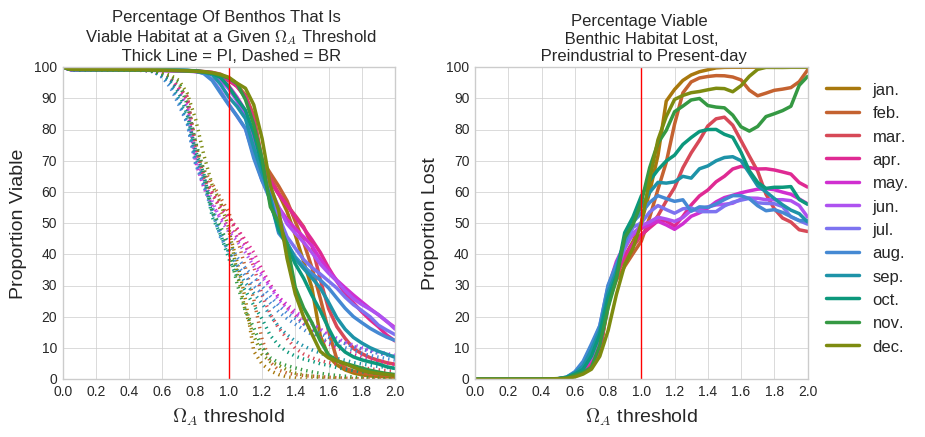

In [22]:
fact = 0.7
fig = plt.figure(figsize=(12*fact,6.5*fact))
lw = 2.5
ax = fig.add_subplot(1,2,1)
#tplt = np.ma.masked_values(PI_OmA_apr_benthos,0)

ax.plot(thresholds,100*(PI_jan_hab/total_habitable_cells),\
        color = tcm(1.*0/12), linewidth = lw, label = 'PI jan.')
ax.plot(thresholds,100*(BR_jan_hab/total_habitable_cells),\
        color = tcm(1.*0/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_feb_hab/total_habitable_cells),\
        color = tcm(1.*1/12), linewidth = lw, label = 'PI feb.')
ax.plot(thresholds,100*(BR_feb_hab/total_habitable_cells),\
        color = tcm(1.*1/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_mar_hab/total_habitable_cells),\
        color = tcm(1.*2/12), linewidth = lw, label = 'PI mar.')
ax.plot(thresholds,100*(BR_mar_hab/total_habitable_cells),\
        color = tcm(1.*2/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_apr_hab/total_habitable_cells),\
        color = tcm(1.*3/12), linewidth = lw, label = 'PI apr.')
ax.plot(thresholds,100*(BR_apr_hab/total_habitable_cells),\
        color = tcm(1.*3/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_may_hab/total_habitable_cells),\
        color = tcm(1.*4/12), linewidth = lw, label = 'PI may.')
ax.plot(thresholds,100*(BR_may_hab/total_habitable_cells),\
        color = tcm(1.*4/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_jun_hab/total_habitable_cells),\
        color = tcm(1.*5/12), linewidth = lw, label = 'PI jun.')
ax.plot(thresholds,100*(BR_jun_hab/total_habitable_cells),\
        color = tcm(1.*5/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_jul_hab/total_habitable_cells),\
        color = tcm(1.*6/12), linewidth = lw, label = 'PI jul.')
ax.plot(thresholds,100*(BR_jul_hab/total_habitable_cells),\
        color = tcm(1.*7/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_aug_hab/total_habitable_cells),\
        color = tcm(1.*7/12), linewidth = lw, label = 'PI aug.')
ax.plot(thresholds,100*(BR_aug_hab/total_habitable_cells),\
        color = tcm(1.*7/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_sep_hab/total_habitable_cells),\
        color = tcm(1.*8/12), linewidth = lw, label = 'PI sep.')
ax.plot(thresholds,100*(BR_sep_hab/total_habitable_cells),\
        color = tcm(1.*8/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_oct_hab/total_habitable_cells),\
        color = tcm(1.*9/12), linewidth = lw, label = 'PI oct.')
ax.plot(thresholds,100*(BR_oct_hab/total_habitable_cells),\
        color = tcm(1.*9/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_nov_hab/total_habitable_cells),\
        color = tcm(1.*10/12), linewidth = lw, label = 'PI nov.')
ax.plot(thresholds,100*(BR_nov_hab/total_habitable_cells),\
        color = tcm(1.*10/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_dec_hab/total_habitable_cells),\
        color = tcm(1.*11/12), linewidth = lw, label = 'PI dec.')
ax.plot(thresholds,100*(BR_dec_hab/total_habitable_cells),\
        color = tcm(1.*11/12), linestyle = ':', linewidth = lw)
plt.axvline(x=1, color = 'red')

ax.set_xticks(np.arange(0, 2.2, step=0.2))
ax.set_yticks(np.arange(0, 110, step=10))
ax.set_xlabel('$\Omega_A$ threshold', fontsize = 14)
ax.set_ylabel('Proportion Viable', fontsize = 14)
ax.set_title('Percentage Of Benthos That Is \n Viable Habitat at a Given $\Omega_A$ Threshold \n Thick Line = PI, Dashed = BR')

ax = fig.add_subplot(1,2,2)
#tplt = np.ma.masked_values(PI_OmA_apr_benthos,0)
ax.plot(thresholds,(100*(PI_jan_hab-BR_jan_hab)/PI_jan_hab),\
        color = tcm(1.*0/12), linewidth = lw, label = 'jan.')
ax.plot(thresholds,(100*(PI_feb_hab-BR_feb_hab)/PI_feb_hab),\
        color = tcm(1.*1/12), linewidth = lw, label = 'feb.')
ax.plot(thresholds,(100*(PI_mar_hab-BR_mar_hab)/PI_mar_hab),\
        color = tcm(1.*2/12), linewidth = lw, label = 'mar.')
ax.plot(thresholds,(100*(PI_apr_hab-BR_apr_hab)/PI_apr_hab),\
        color = tcm(1.*3/12), linewidth = lw, label = 'apr.')
ax.plot(thresholds,(100*(PI_may_hab-BR_may_hab)/PI_may_hab),\
        color = tcm(1.*4/12), linewidth = lw, label = 'may.')
ax.plot(thresholds,(100*(PI_jun_hab-BR_jun_hab)/PI_jun_hab),\
        color = tcm(1.*5/12), linewidth = lw, label = 'jun.')
ax.plot(thresholds,(100*(PI_jul_hab-BR_jul_hab)/PI_jul_hab),\
        color = tcm(1.*6/12), linewidth = lw, label = 'jul.')
ax.plot(thresholds,(100*(PI_aug_hab-BR_aug_hab)/PI_aug_hab),\
        color = tcm(1.*7/12), linewidth = lw, label = 'aug.')
ax.plot(thresholds,(100*(PI_sep_hab-BR_sep_hab)/PI_sep_hab),\
        color = tcm(1.*8/12), linewidth = lw, label = 'sep.')
ax.plot(thresholds,(100*(PI_oct_hab-BR_oct_hab)/PI_oct_hab),\
        color = tcm(1.*9/12), linewidth = lw, label = 'oct.')
ax.plot(thresholds,(100*(PI_nov_hab-BR_nov_hab)/PI_nov_hab),\
        color = tcm(1.*10/12), linewidth = lw, label = 'nov.')
ax.plot(thresholds,(100*(PI_dec_hab-BR_dec_hab)/PI_dec_hab),\
        color = tcm(1.*11/12), linewidth = lw, label = 'dec.')
plt.axvline(x=1, color = 'red')
ax.set_title('')
ax.set_ylim(0,100)
ax.legend(loc = 'lower right')
ax.set_xticks(np.arange(0, 2.2, step=0.2))
ax.set_yticks(np.arange(0, 110, step=10))
ax.set_xlabel('$\Omega_A$ threshold', fontsize = 14)
ax.set_ylabel('Proportion Lost', fontsize = 14)
ax.set_title('Percentage Viable \n Benthic Habitat Lost, \n Preindustrial to Present-day')
ax.legend(bbox_to_anchor=(1.35, 1),)
plt.tight_layout()

In [23]:
#code for checking that these numbers make sense:
# ti = 15
# print(total_habitable_cells)
# print(thresholds[ti])
# print(BR_aug_hab[ti])
# print((BR_aug_hab[ti]/total_habitable_cells)*100)


### Another thing to try: a more temporally detailed look

Monthly averages are only one side of the story. Another question to consider: for a given threshold, how many days out of the month does a given cell experience acceptable conditions? Coming soon...

# That's it for now!

In [24]:
print()